In [1]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
5701,Crash Nitro Kart,XB,2003.0,Racing,0.24,0.07,0.00,0.01,70.0,8.9,E
14617,Curious George,XB,2006.0,Action,0.02,0.01,0.00,0.00,57.0,tbd,E
7790,Fighter Within,XOne,2013.0,Fighting,0.11,0.07,0.00,0.02,23.0,3,T
3500,Petz Dogz 2,Wii,2007.0,Simulation,0.52,0.01,0.00,0.04,NaN,tbd,E
7451,Final Fantasy Fables: Chocobo's Dungeon,Wii,2007.0,Role-Playing,0.09,0.00,0.11,0.01,76.0,8,E10+


In [4]:
def fast_info(data):
    data_info = pd.DataFrame()
    data_info['describe'] = data.info()
    data_info['is_na'] = data.isna().sum()
    return data_info
#fast_info(data)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


##### **Промежуточный вывод** <br>
Датасет состоит из 16715 строк, 11 столбцов.
Описание данных
Name — название игры<br>
Platform — платформа<br>
Year_of_Release — год выпуска<br>
Genre — жанр игры<br>
NA_sales — продажи в Северной Америке (миллионы проданных копий)<br>
EU_sales — продажи в Европе (миллионы проданных копий)<br>
JP_sales — продажи в Японии (миллионы проданных копий)<br>
Other_sales — продажи в других странах (миллионы проданных копий)<br>
Critic_Score — оценка критиков (максимум 100)<br>
User_Score — оценка пользователей (максимум 10)<br>
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.<br>

* Необходимо переименовать все столбы, записав и мена в нижнем регистре
* в столбцах с именем, годом релиза , оценкой пользователей и критиков, а также рейтингом есть пропущенные данные
* Столбец с годом релиза игрым ожно привести к типу dtypes
* столбцы с оценкой пользователей привести к типу float64

#### Предобратботка данных и создание дополнительных стобцов и переменных:
Запланировано:
* Приведу названия столбцов к одному стилю;
* Преобразую данные в нужные типы;
* Обработаю пропуски при необходимости:
* Посчитаю суммарные продажи во всех регионах и запишу их в отдельный столбец.

##### Приведем названия столбцов к нижнему регистру

In [8]:
data.rename(columns=str.lower, inplace=True)

#проверим названия
list(data.columns.values)

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

##### Преобразуем данные к нужному типу

###### Столбец year_of_release
Посмотрим на его значения

In [9]:
data['year_of_release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

В датасете представлены данные с 1980 по 2016 год. Годы указаны в формате с точкой. В данных есть 269 строк, в которых год не указан. Это небольшое количество, меньше 2%. Если пропуски не имеют общих признаков, их можно удалить

In [10]:
data.query('year_of_release.isna()').sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
8150,Twisted Metal: Small Brawl,PS,NaN,Action,0.10,0.07,0.00,0.01,51.0,7.6,T
14931,The King of Fighters: Maximum Impact - Maniax,XB,NaN,Fighting,0.02,0.01,0.00,0.00,NaN,NaN,NaN
8067,Backbreaker,X360,NaN,Sports,0.17,0.00,0.00,0.01,54.0,7.6,E
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
11622,Happy Feet Two,Wii,NaN,Action,0.06,0.01,0.00,0.01,NaN,NaN,NaN
6773,Mega Man X Collection,PS2,NaN,Misc,0.12,0.09,0.00,0.03,73.0,8.8,E
7008,Tribes: Aerial Assault,PS2,NaN,Shooter,0.11,0.09,0.00,0.03,73.0,8.8,T
15754,Virtua Quest,PS2,NaN,Role-Playing,0.01,0.01,0.00,0.00,53.0,7.6,T
12880,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,0.00,0.05,0.00,0.01,NaN,tbd,E10+
14449,Fullmetal Alchemist: Brotherhood,PSP,NaN,Action,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В датасете есть данные по всем жанрам, а судя по годам названия и по разных годам выхода. Значит, данные случайны. Удалим их из датасета и поменяем тип столбца с годом выпуска на date_time

In [11]:
data_na = data.query('year_of_release.isna()')

In [12]:
data_na.sample(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15022,Umineko no Naku Koro ni San: Shinjitsu to Gens...,PS3,NaN,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
1131,Call of Duty: Black Ops,PC,NaN,Shooter,0.58,0.81,0.00,0.23,81.0,5.2,M
7848,Pet Zombies,3DS,NaN,Simulation,0.18,0.00,0.00,0.01,NaN,tbd,T
4818,LEGO Harry Potter: Years 5-7,3DS,NaN,Action,0.18,0.19,0.00,0.03,71.0,6.5,E10+
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
3704,Def Jam: Fight for NY,XB,NaN,Fighting,0.43,0.10,0.00,0.02,84.0,8.5,M
5070,The Golden Compass,PSP,NaN,Action,0.11,0.16,0.00,0.10,28.0,4.1,E10+
14769,Super Duper Sumos,GBA,NaN,Action,0.02,0.01,0.00,0.00,57.0,tbd,E
4775,NFL GameDay 2003,PS2,NaN,Sports,0.20,0.15,0.00,0.05,60.0,tbd,E
14252,Swords,Wii,NaN,Fighting,0.03,0.00,0.00,0.00,NaN,tbd,T


In [13]:
data_na.shape

(269, 11)

In [14]:
data = data.query('year_of_release.isna() == False')
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')
data['year_of_release'] = data['year_of_release'].dt.year

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [16]:
data['year_of_release'].sort_values().unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016])

###### Столбец *'user_score'*
В столбце с датой релиза игры остались только целочисленные значения по годам

Проверим столбец *'user_score'* Возможно, его можно преобразовать к типу данных *'float64'*

In [17]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Есть строки со значениями **tbd**. Это сокращение от "to be determined" - "будет определен". Это игры, рейтиг которых ещё не определен. Как вариант - недостаточное количество голосов. Посмотрим эти значения

In [18]:
data.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Оценку пользователей tbd имеют 2376 игр разных лет выпуска, разных жанров. Удлим эти данные, для анализа отсутствие они означают отсутсвтие рейтинга

In [19]:
data['user_score'] = data['user_score'].replace('tbd',None)

In [20]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Поменяем тип данных на float64

In [21]:
data['user_score'] = data['user_score'].astype('float64')

In [22]:
data['user_score'].dtypes

dtype('float64')

##### Обработка дубликатов

In [23]:
data.duplicated().sum()

0

In [24]:
data.drop_duplicates(subset = ['name', 'platform'], inplace = True)
data.shape

(16442, 11)

явных дубликатов нет, в том числе по паре "Название игры" + "Платформа"

##### Удаление пропусков 
В столбце с названиями были пропущенные значения. Удалим их (было всего 2)

In [25]:
data.dropna(subset = ['name'], inplace = True)
data.shape

(16441, 11)

In [26]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         7834
rating             6676
dtype: int64

Остались только пропущенные значения в столбцах с рейтингом и ооценками. Таких строк довольно много, удалить их нельзяю. Заполнить тоже нельзя, т.к. рейтинг игры зависит от многих значений

##### Создание нового столбца

Посчитаем сумму продажи во всех регионах по каждой игре и запишу их в новый столбец


In [27]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] 
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


##### Вывод по предобработке данных
**Были изменены типы данных:**

год выпуска на datetime<br>
оценка пользователей на float64

**Были удалены строки:**
в которых отсутствовал год релиза игры (269 строк)
С пропусками в названии (1 строка)

**Был создан столбец, в котором посчитана общая сумма выручки от продажи игры**

 

#### Исследовательский анализ данных
* Определю актуальные периоды для анализа 
* посмотрю как менялись продажи в зависимости от платформы. 
* Определю характерный срок появления новых и исчезновения старых платформ
* Определю какие платформы лидируют по продажам, растут или падают. 
* Выберу несколько потенциально прибыльных платформ.
* определю как влияют на продажи внутри одной популярной платформы и в отношении несольких отзывы пользователей и критиков.
* определю самые прибыльных жанры и жанры с самыми высокими и низкими продажами

In [72]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,718.000000,925.000000,1689.000000
mean,2014.953227,0.168182,0.160261,0.055115,0.048324,72.306407,6.621730,0.431883
std,0.799624,0.446134,0.466846,0.211513,0.141790,12.213500,1.602742,1.056109
min,2014.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.200000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.800000,0.030000
50%,2015.000000,0.020000,0.020000,0.010000,0.010000,74.000000,7.000000,0.100000
75%,2016.000000,0.120000,0.120000,0.040000,0.040000,81.000000,7.800000,0.350000
max,2016.000000,6.030000,6.310000,3.180000,2.380000,97.000000,9.300000,14.630000


##### Актуальные периоды для анализа

Проверим количество игр, которые выходили ежегодно. Построим график

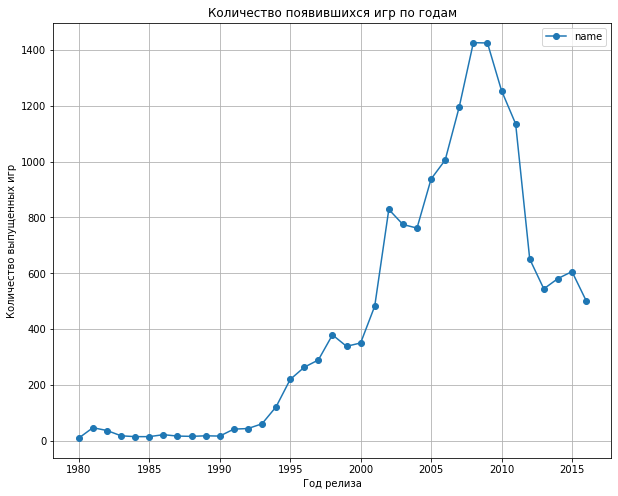

In [28]:
data.pivot_table(index = 'year_of_release', 
                 values = 'name', 
                 aggfunc = 'count').plot(grid = True,
                                         figsize = (10,8),
                                         marker = 'o')
plt.xlabel('Год релиза')
plt.ylabel('Количество выпущенных игр')
plt.legend()
plt.title('Количество появившихся игр по годам')
plt.show()

заметно, что примерно 1993 году номенклатура видеоигр значительно расширилась. При этом после 2000 года рост ускорился и максимального разнообразия видеоигры достигли в 2008 году. После этого заметен серьёзный откат до показателей начала 2000х. Скорее всего, это объясняется тем. что после 2000 года появлялось много разных игр. Создатели "прощупывали рынок".

Посмотрим данные по количеству продаж

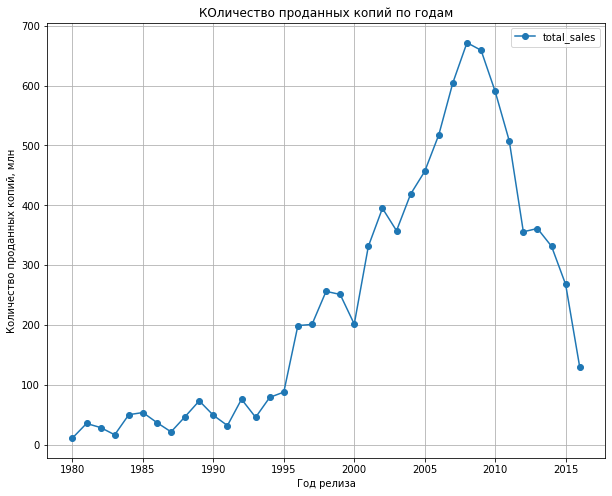

In [29]:
data.pivot_table(index = 'year_of_release', 
                 values = 'total_sales', 
                 aggfunc = 'sum').plot(grid = True,
                                         figsize = (10,8),
                                         marker = 'o')
plt.xlabel('Год релиза')
plt.ylabel('Количество проданных копий, млн')
plt.legend()
plt.title('КОличество проданных копий по годам')
plt.show()

**Промежуточный вывод**

В целом, картина повторяется. Наблюдается серьёзный рост после 1995 года, когда за год количество копий видеоигр выросло в 2 раза (неудивительно, в 1996 вышли Покемоны на GameBoy, а также вариации на тему Марио на Nintendo 64)

<div class="alert alert-info"> <b>Комментарии студента:</b> Действительно круто! Спасибо, забрал! Слышал, что Seaborn крутая. Буду разбираться как только время найду. </div>

##### Продажи в зависимости от платформ 
Посмотрим как менялись продажи в зависимости от платформ

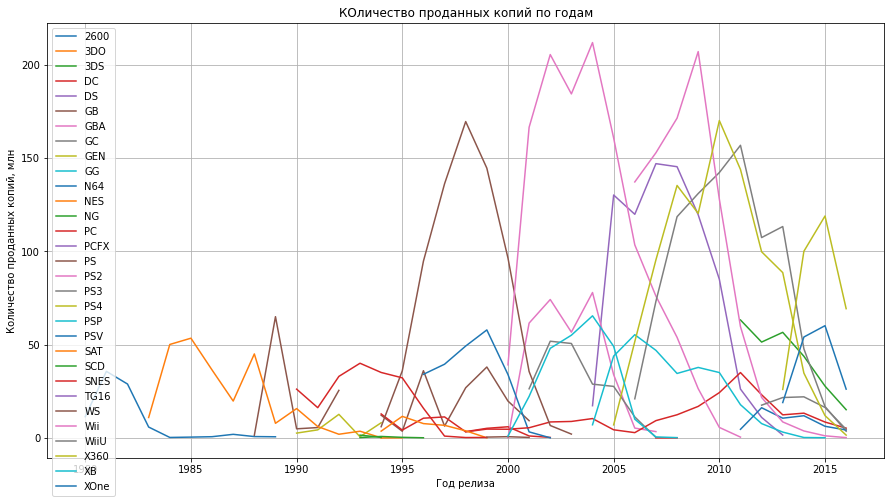

In [30]:
data.pivot_table(index = 'year_of_release', 
                 columns = 'platform',
                 values = 'total_sales',
                 aggfunc = 'sum').plot(figsize = (15,8), grid = True)
plt.xlabel('Год релиза')
plt.ylabel('Количество проданных копий, млн')
plt.legend()
plt.title('КОличество проданных копий по годам')
plt.show()

Графики не очень удобночитаемы, но по ним можно знаметить, что некоторые линии обрываются в какой-то промежуток времени. Значит, продажи на эти платформы прекратились и платформы просто перестали существовать. Это логично. НА смену PS2 пришла PS3, XBox360 сменилась XBox One и т.д. 

При этом жизненный цикл всех платформ выглядит примерно одинаково: есть подъём, пик и спад. 
Жизненный цикл с активными продажами составляет примерно 7 лет, при этом новые платформы появлялись примерно каждые 5 лет. 

Можно выделить условных несколько циклов:
1. До 1990 года
2. 1990 - 2000
3. 1995 - 2002
4. 2000 - 2007
5. 2004 - 2015 (самый долгий срок жизни платформ)
6. 2010 - 2015

Также по графику видно, что в 2016 году продажи по всем платформам "упали". Это произошло из-за того, что за 2016 год данные не полные. 

*Посмотрим графики по перечисленным циклам*

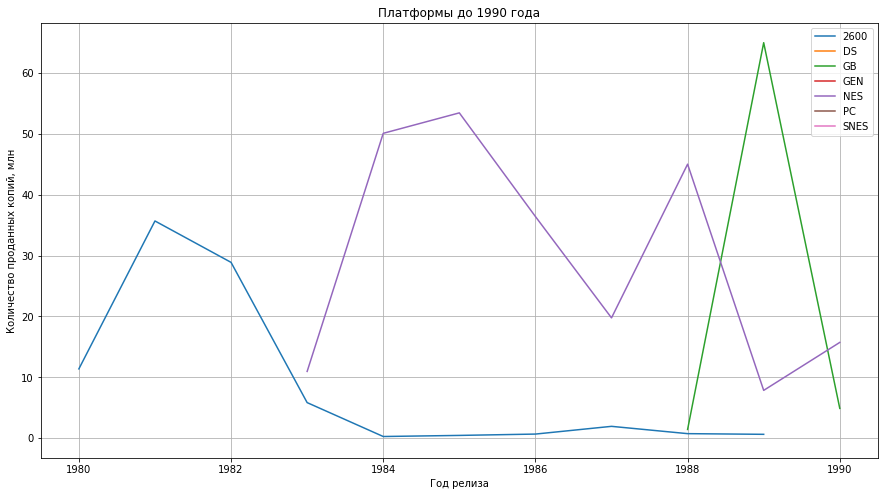

In [31]:
data.query('year_of_release <= 1990').pivot_table(index = 'year_of_release', 
                 columns = 'platform',
                 values = 'total_sales',
                 aggfunc = 'sum').plot(figsize = (15,8), grid = True)
plt.xlabel('Год релиза')
plt.ylabel('Количество проданных копий, млн')
plt.legend()
plt.title('Платформы до 1990 года')
plt.show()

До 1990 года в целом существовало три популярных платформы: Atari 2600, NES От нинтендо и GameBoy. На графике заметно, что на конец отображаемого жизненного цикла их продажи упали почти до нуля

Для следующего периода добавим условие с количеством проданных копий больше 1 млн, чтобы не отображать платформы с малым количеством продаж

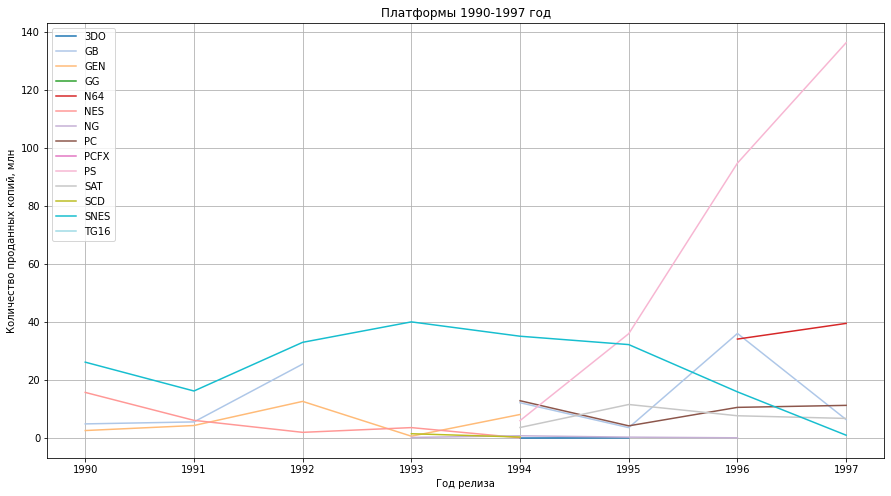

In [32]:
data.query('1990 <= year_of_release <= 1997').pivot_table(index = 'year_of_release', 
                 columns = 'platform',
                 values = 'total_sales',
                 aggfunc = 'sum').plot(figsize = (15,8), grid = True, cmap='tab20')
plt.xlabel('Год релиза')
plt.ylabel('Количество проданных копий, млн')
plt.legend()
plt.title('Платформы 1990-1997 год')
plt.show()

на графике очень много платформ, которые засоряют его (появляются в 1994 году, это платформа из другого периода. Например, на этом графике платформа N64 появляется только в 1996 году, но она есть в легенде и на графике).

**Выход** напишем функцию, которая отсекает все лишние платформы для исследуемого промежутка и оставляет только актуальные.

Функция is_in_interval определеят, что платформа входит в указанный интервал не менее чем в половине рассматриваемых лет. Это позволит отсеять лишние в периоде платформы (например, те, которые появляются один раз. Они на графике отвлекают внимание)

In [33]:
def is_in_interval(df,y_from,y_to):
    platforms_in_interval = [] #список для отсеянных платформ
    for platform in df.query('(@y_from <= year_of_release <= @y_to)')['platform'].unique(): #список уникальных платформ, которые появляются в указанном промежутке
        count = 0 #счетчик для количества лет, в которых есть продажи игр для платформы платформа
        for year in df.query('(@y_from <= year_of_release <= @y_to) and platform == @platform')['year_of_release'].unique():
            if platform in df.query('(@y_from <= year_of_release <= @y_to)')['platform'].unique():
                count +=1 #если для выбранной платформы есть упоминание этого года, то увеличиваем счетчик
        if (count/(int(y_to)-int(y_from)+1)) > 0.5: #проверяем, что игры для платформы пристутсвуют хотя бы в половине лет периода
            platforms_in_interval.append(platform)

    return platforms_in_interval 

Теперь построим график только для платформ, актуальных в этот период с помощью написанной функции

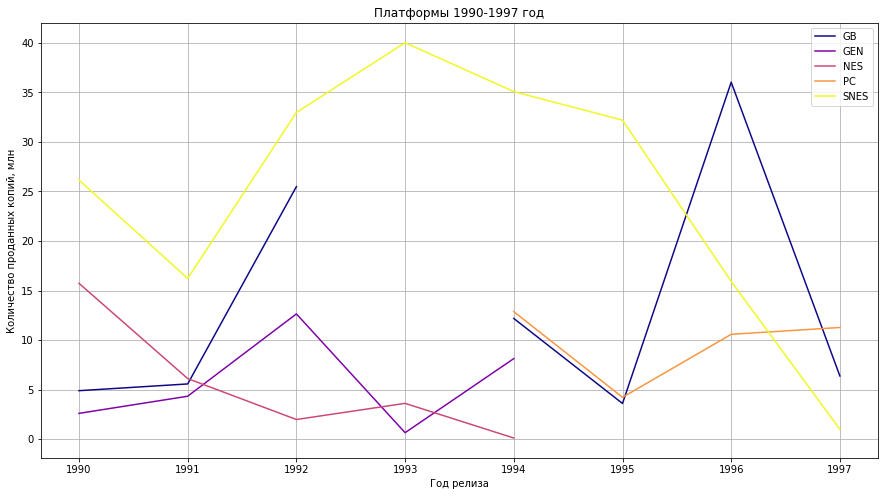

In [34]:
y_from = 1990
y_to = 1997
platform_list = is_in_interval(data,y_from,y_to)
data.query('@y_from <= year_of_release <= @y_to and platform in @platform_list').pivot_table(index = 'year_of_release', 
                 columns = 'platform',
                 values = 'total_sales',
                 aggfunc = 'sum').plot(figsize = (15,8), grid = True, cmap='plasma')

plt.xlabel('Год релиза')
plt.ylabel('Количество проданных копий, млн')
plt.legend()
plt.title('Платформы 1990-1997 год')
plt.show()

Результат намного лучше. На графике остальись только платформы, актуальные для выбранного периода
Из популярных платформ появились SNES и GEN.Жизненный цикл обеих платформ укладываются в срок 7 лет. ДЛя NES и GEN пять лет 
Появляются игры для персональных компьютеров

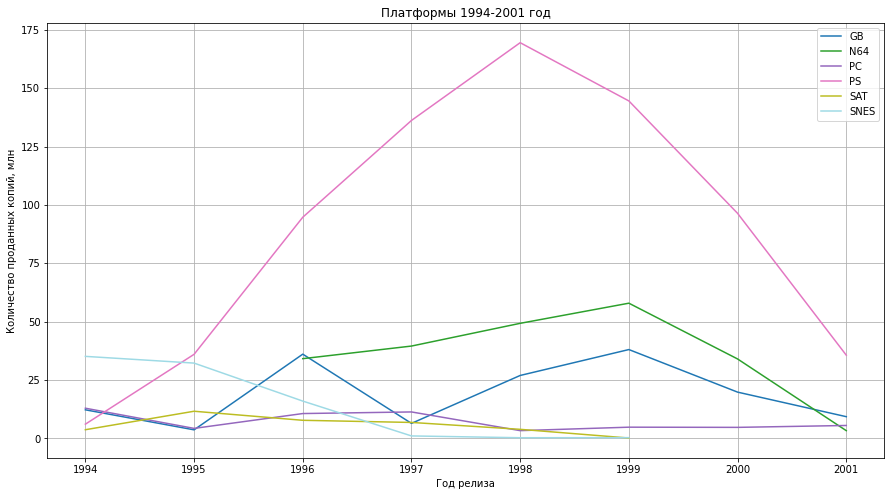

In [35]:
y_from = 1994
y_to = 2001
platform_list = is_in_interval(data,y_from,y_to)
data.query('@y_from <= year_of_release <= @y_to and platform in @platform_list').pivot_table(index = 'year_of_release', 
                 columns = 'platform',
                 values = 'total_sales',
                 aggfunc = 'sum').plot(figsize = (15,8), grid = True, cmap='tab20')
plt.xlabel('Год релиза')
plt.ylabel('Количество проданных копий, млн')
plt.legend()
plt.title('Платформы 1994-2001 год')
plt.show()

Этот цикл ознаменован появление легендарной PS, N64. И снова у всех платформ жизненный цикл укладывается в 7 лет. Относительной постоянностью обладает спрос игр на персональные компьютеры (РС)

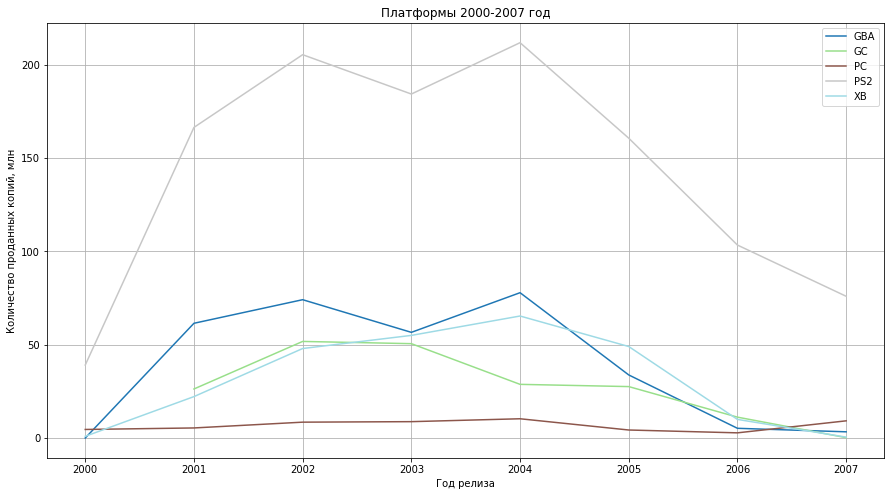

In [36]:
y_from = 2000
y_to = 2007
platform_list = is_in_interval(data,y_from,y_to)
data.query('@y_from <= year_of_release <= @y_to and platform in @platform_list').pivot_table(index = 'year_of_release', 
                 columns = 'platform',
                 values = 'total_sales',
                 aggfunc = 'sum').plot(figsize = (15,8), grid = True, cmap='tab20')
plt.xlabel('Год релиза')
plt.ylabel('Количество проданных копий, млн')
plt.legend()
plt.title('Платформы 2000-2007 год')
plt.show()

Появились приставки PS2, GBA, GC, XB. Жизненный цикл укладывается в 7 лет. Спрос игр на персональные компьютеры стаблиьный на уровне 7-10 млн копий

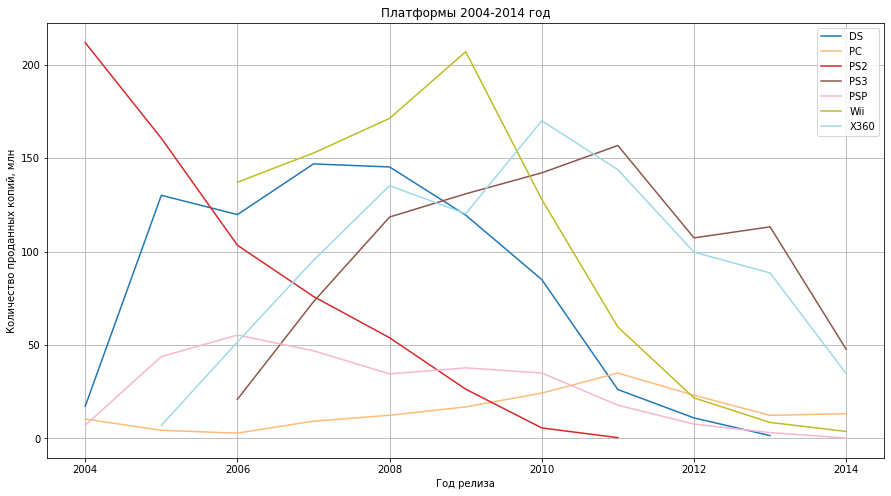

In [37]:
y_from = 2004
y_to = 2014
platform_list = is_in_interval(data,y_from,y_to)
data.query('@y_from <= year_of_release <= @y_to and platform in @platform_list').pivot_table(index = 'year_of_release', 
                 columns = 'platform',
                 values = 'total_sales',
                 aggfunc = 'sum').plot(figsize = (15,8), grid = True, cmap='tab20')
plt.xlabel('Год релиза')
plt.ylabel('Количество проданных копий, млн')
plt.legend()
plt.title('Платформы 2004-2014 год')
plt.show()

В этом цикле платформы живут дольше. Скорее всего сказывается достаточно высокая мощность железа, чтобы игры могли выходить дольше.

До сих пор популярна PS2, в течение 10 лет была популярна DS, PSP, XBOX360, PS3
На этот период приходится пик популярности персонального комьютера как игровой платформы

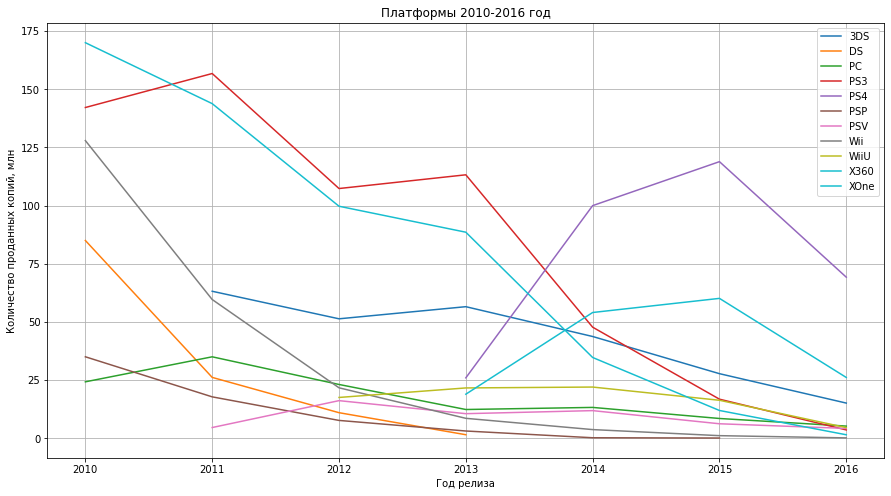

In [38]:
y_from = 2010
y_to = 2016
platform_list = is_in_interval(data,y_from,y_to)
data.query('@y_from <= year_of_release <= @y_to and platform in @platform_list').pivot_table(index = 'year_of_release', 
                 columns = 'platform',
                 values = 'total_sales',
                 aggfunc = 'sum').plot(figsize = (15,8), grid = True, cmap='tab10')
plt.xlabel('Год релиза')
plt.ylabel('Количество проданных копий, млн')
plt.legend()
plt.title('Платформы 2010-2016 год')
plt.show()

В указанном периоде большинство игровых платформ заканчивают свой жизненный цикл. Исключение составляют PS4, XBO ONE и 3DS. То есть две стационарные и одна мобильная приставки. Снижение количества купленных копий игр в 2016 году обусловлено неполнотой данных за 2016 год

##### Определение самых популярных платформ

Определим топ-10 самых популярные платормы за все время и построим график проданных копий для них

In [39]:
top_platform = data.groupby(by = 'platform')['total_sales'].sum().sort_values(ascending = False).reset_index()
top_platform

,platform,total_sales
0,PS2,1233.56
1,X360,959.99
2,PS3,931.33
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


In [40]:
top10_list = top_platform['platform'].head(10)

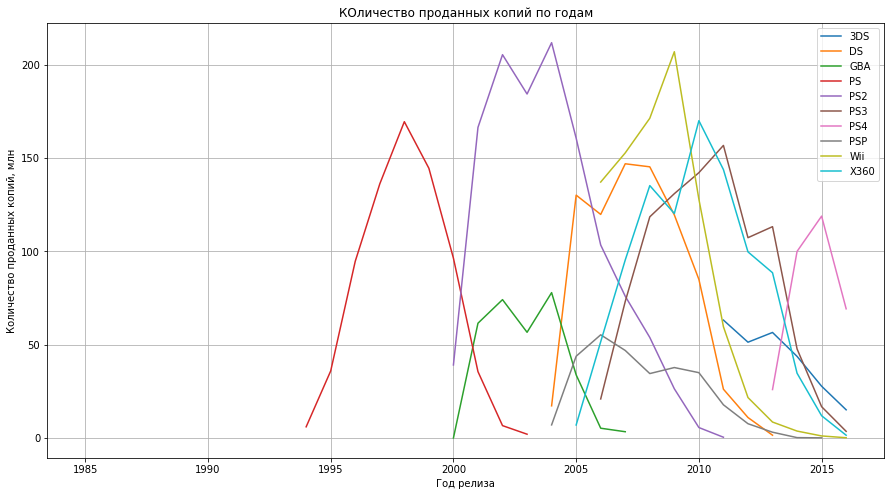

In [41]:
data.query('platform in @top10_list').pivot_table(index = 'year_of_release', 
                 columns = 'platform',
                 values = 'total_sales',
                 aggfunc = 'sum').plot(figsize = (15,8), grid = True, cmap = 'tab10')
plt.xlabel('Год релиза')
plt.ylabel('Количество проданных копий, млн')
plt.legend()
plt.title('КОличество проданных копий по годам')
plt.show()

Все таки Play Station выигрывает в споре самой попрулярной платформы. Количество копий проданных игр для неё значительно превосходит остальные. В топ-10 не попала XBOX One, но она все равно набирает популярность

##### Промежуточный вывод
Новые платформы появляются каждые 5 лет. Жизненный цикл платформы составляет в среднем 7 лет. Ближе к 2016 году жизненный цикл увеличивается до 9-10 лет. Относительно стаблиьный но невысокий спрос на игры для персональных компьютеров

Потенциально интересные платформы: PS4, XBOX One, 3DS


In [42]:
data_all = data #оставим на всякий случай все данные
data = data.query('year_of_release >= 2014')
data.shape

(1689, 12)

In [43]:
top_platform_now = data.groupby(by = 'platform')['total_sales'].sum().sort_values(ascending = False).reset_index()
top_platform_now

,platform,total_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22
5,WiiU,42.98
6,PC,27.05
7,PSV,22.40
8,Wii,5.07
9,PSP,0.36


In [44]:
top_list_now = top_platform_now['platform']

Построим график "ящик с усами" для 10 наиболее продаваемых платформ

In [45]:
data.query('platform in @top_list_now')['total_sales'].describe()

count    1689.000000
mean        0.431883
std         1.056109
min         0.010000
25%         0.030000
50%         0.100000
75%         0.350000
max        14.630000
Name: total_sales, dtype: float64

При среднем значении в 0.43  медиана 0.1 млн проданных копий. Среднее смещено из-за большого количества выбросов. При максимальном значении в 82,54 график будет ненаглядным.  Найдем границы для графика 

In [46]:
q1 = 0.07
q3 = 0.49
iqr = q3-q1
print(q1-1.5*iqr,q3+1.5*iqr)

-0.56 1.12


Будем строить график длня значений с продажами меньше 1.12

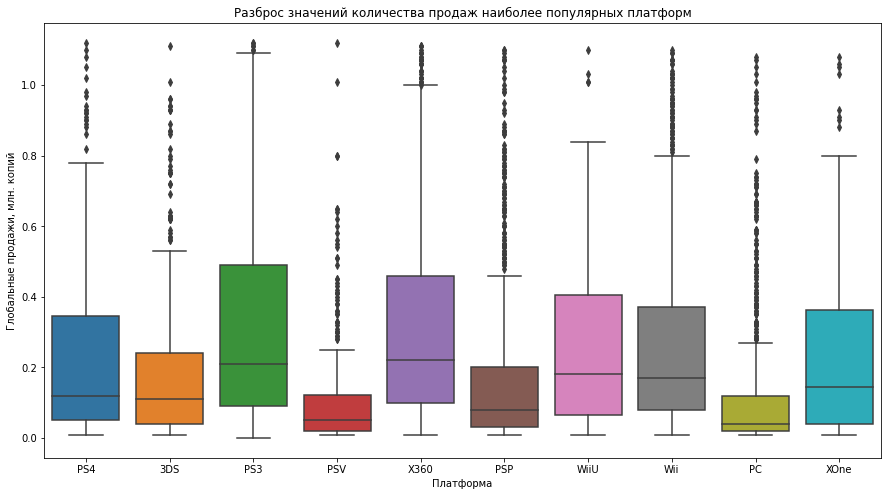

In [47]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data_all.query('platform in @top_list_now and total_sales < 1.12'), x='platform', y='total_sales')
plt.title('Разброс значений количества продаж наиболее популярных платформ')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи, млн. копий')
plt.show()

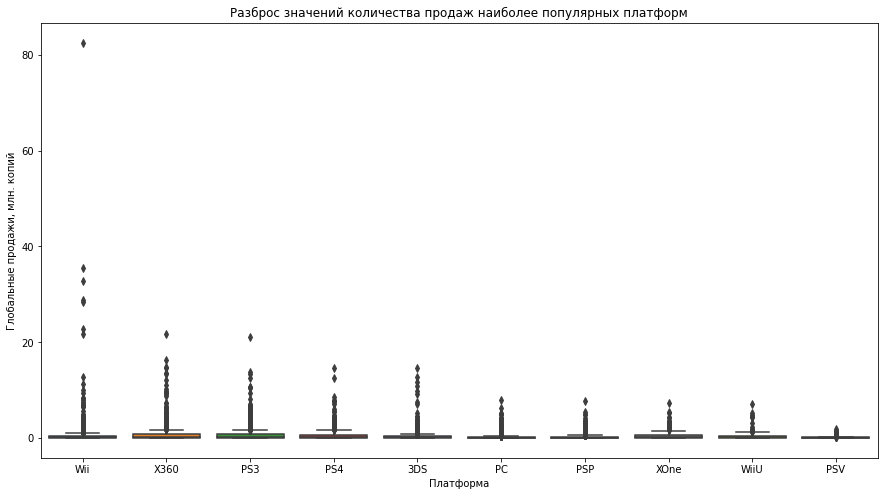

In [48]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data_all.query('platform in @top_list_now'), x='platform', y='total_sales')
plt.title('Разброс значений количества продаж наиболее популярных платформ')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи, млн. копий')
plt.show()

In [49]:
data_all.query('platform == "Wii"').sort_values('total_sales').tail(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
61,Just Dance 3,Wii,2011,Misc,5.95,3.11,0.00,1.06,74.0,7.8,E10+,10.12
49,Super Mario Galaxy,Wii,2007,Platform,6.06,3.35,1.20,0.74,97.0,8.9,E,11.35
39,Super Smash Bros. Brawl,Wii,2008,Fighting,6.62,2.55,2.66,1.01,93.0,8.9,T,12.84
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54


###### Вывод по графику разброса значений

- Построены графики разброса значений для 10 наиьолее популярных платформ
- Медианные значения не одинаковые, лежат в границах примерно от 100 до 200 тысяч проданных копий

##### Определить влияют ли на продажи внутри одной платформы отзывы пользователей
Посмотрим платформы с самым большим количеством отзывов

In [50]:
data.groupby('platform')['user_score'].count().reset_index().sort_values('user_score', ascending = False).head(5)

,platform,user_score
3,PS4,244
9,XOne,168
1,PC,123
2,PS3,108
8,X360,87


Наибольшее количество оцененных игр было на платформе <strike>PS2</strike> PS4. Построим матрицу корелляции и хитмэп по этим значениям

In [51]:
data_ps4 = data_all.query('platform == "PS4"')
corr = data_ps4[['user_score','critic_score','total_sales']].corr()
corr

,user_score,critic_score,total_sales
user_score,1.000000,0.556037,-0.027428
critic_score,0.556037,1.000000,0.406568
total_sales,-0.027428,0.406568,1.000000


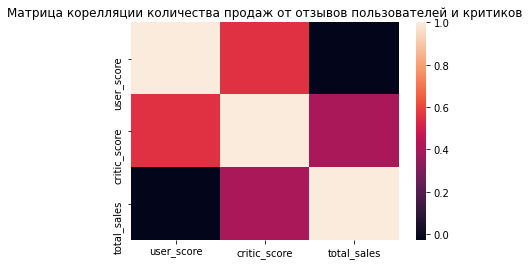

In [52]:
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Матрица корелляции количества продаж от отзывов пользователей и критиков')
plt.show()

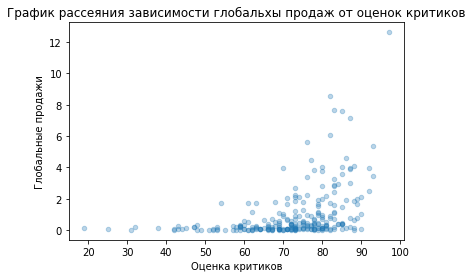

In [53]:
data_ps4.plot.scatter (x = 'critic_score', y = 'total_sales', alpha = 0.3)
plt.xlabel('Оценка критиков')
plt.ylabel('Глобальные продажи')
plt.title('График рассеяния зависимости глобальхы продаж от оценок критиков')
plt.show()

На графике заметна умеренная зависимость между рейтингом критиков и количеством продаж

Создадим датасет, в котором по каждой из топ_10 популярных платорм будут содежраться данные о корелляции между глобальными продажами и оценками критиков и пользователей

In [54]:
corr_top10 = pd.DataFrame(columns = ['platform','user_corr','critic_corr'])
for platform in top_list_now:
    data_platform = data.query('platform == @platform')
    corr_top10.loc[ len(corr_top10.index )] = [platform,
                                               data_platform['user_score'].corr(data_platform['total_sales']),
                                               data_platform['critic_score'].corr(data_platform['total_sales'])]
corr_top10.describe()

,user_corr,critic_corr
count,9.000000,8.000000
mean,0.004544,0.338157
std,0.195997,0.158091
min,-0.184116,0.042665
25%,-0.140529,0.279247
50%,-0.071466,0.386431
75%,0.050588,0.433151
max,0.405213,0.525723


**Вывод**
Мнение критиков в большей степени влияет на продажи игр на популярных платформах

Построим диаграму рейтинга влияния отзывов пользовалетей на продажу игр на платформах

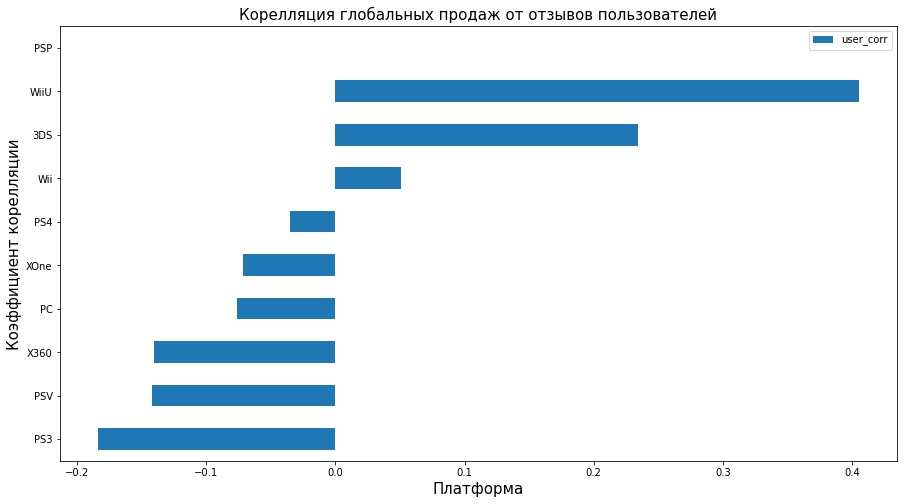

In [55]:
corr_top10.sort_values('user_corr',ascending = True).plot(x = 'platform', y = 'user_corr', kind = 'barh', figsize = (15,8))
plt.xlabel('Платформа', size = 15)
plt.ylabel('Коэффициент корелляции', size = 15)
plt.title('Корелляция глобальных продаж от отзывов пользователей', size = 15)
plt.show()

**Вывод**

<strike>Наибольшее влияние отзывы пользователей оказывают на продаже игр на плафтормах PS, PSP, 3DS и PS2

На платформе PS4 отзывы пользователей оказывают отрицательное влияние на продажи, что как минимум неожиданно

<div class="alert alert-info"> <b>Исправленый вывод</b> Интересное наблюдение: для большей части платформ практически отсутствует кореллояция между отзывами пользоватей и количеством продаж.

При этом для портативных устройств типа WiiU и 3DS умеренная корелляция наблюдается. А вот для PS3 есть отрицательная корелляция. Возможно, какие-то бестселлеры не понравились покупателям?)</div>

Тоже самое сделаем для влияния отзывов критиков

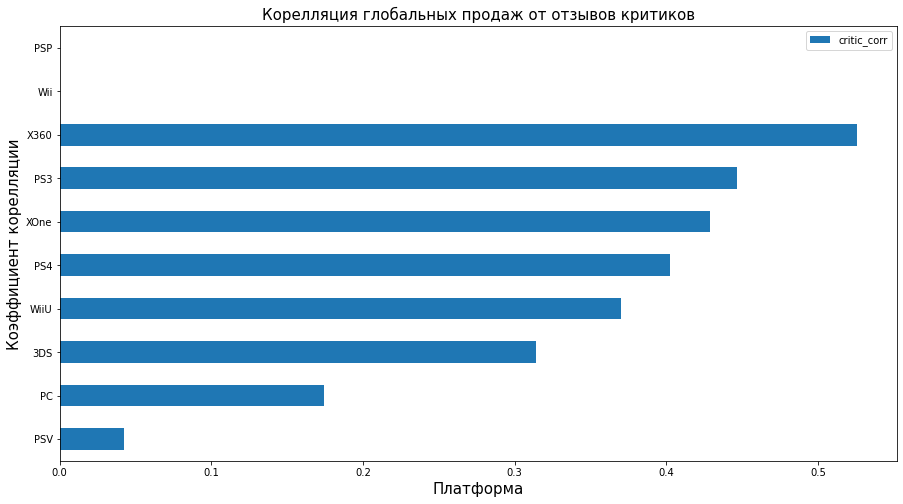

In [56]:
corr_top10.sort_values('critic_corr',ascending = True).plot(x = 'platform', y = 'critic_corr', kind = 'barh', figsize = (15,8))
plt.xlabel('Платформа', size = 15)
plt.ylabel('Коэффициент корелляции', size = 15)
plt.title('Корелляция глобальных продаж от отзывов критиков', size = 15)
plt.show()

**Вывод**

Мнение критиков вносит более весомый вклад в продажи. 

<strike>По этому показателю лидируют все платформы от Sony, а также XBOX 360

##### Определим самые прибыльные жанры, а также жанры с самыми высокими и низкими продажами

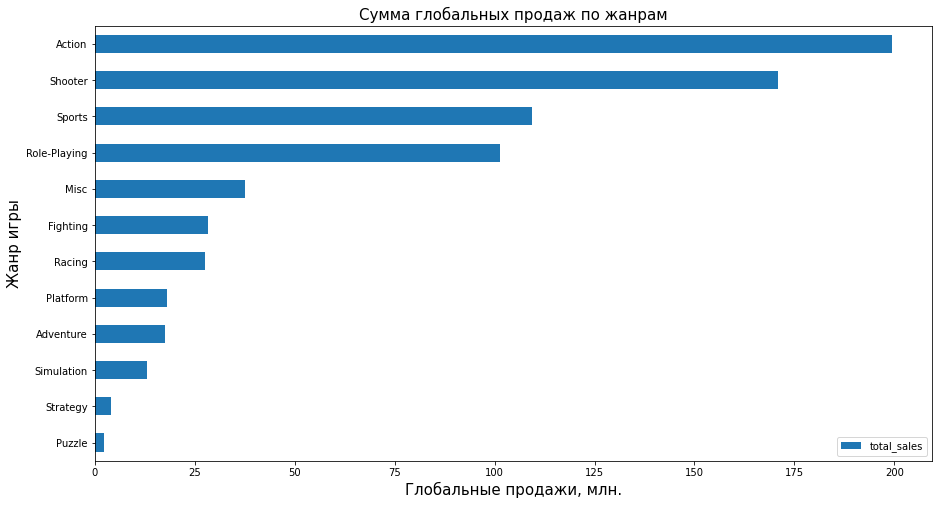

In [57]:
data.groupby('genre')['total_sales'].sum().reset_index().sort_values('total_sales', ascending = True).plot(x = 'genre',
                                                                                                           kind = 'barh', 
                                                                                                           figsize = (15,8))
plt.xlabel('Глобальные продажи, млн.', size = 15)
plt.ylabel('Жанр игры', size = 15)
plt.title('Сумма глобальных продаж по жанрам', size = 15)
plt.show()

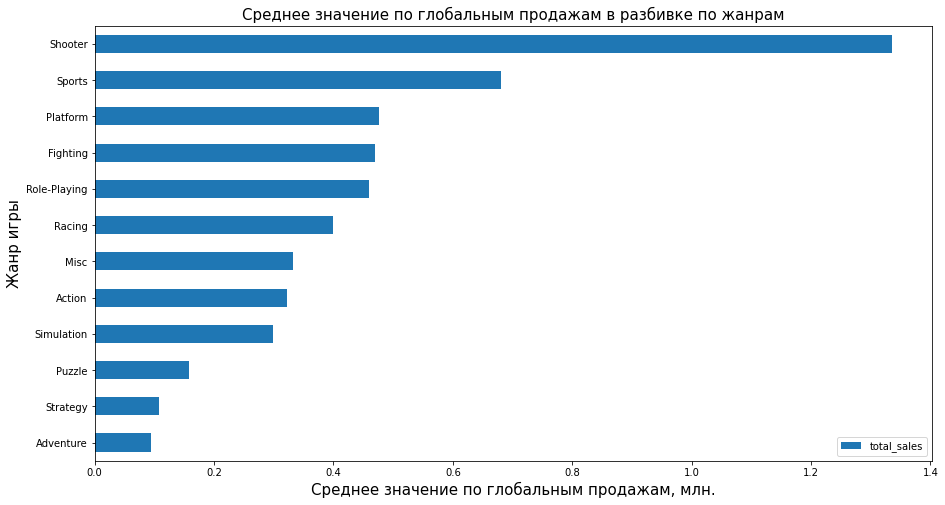

In [58]:
#по среднему значению
data.groupby('genre')['total_sales'].mean().reset_index().sort_values('total_sales', ascending = True).plot(x = 'genre',
                                                                                                           kind = 'barh', 
                                                                                                           figsize = (15,8))
plt.xlabel('Среднее значение по глобальным продажам, млн.', size = 15)
plt.ylabel('Жанр игры', size = 15)
plt.title('Среднее значение по глобальным продажам в разбивке по жанрам', size = 15)
plt.show()

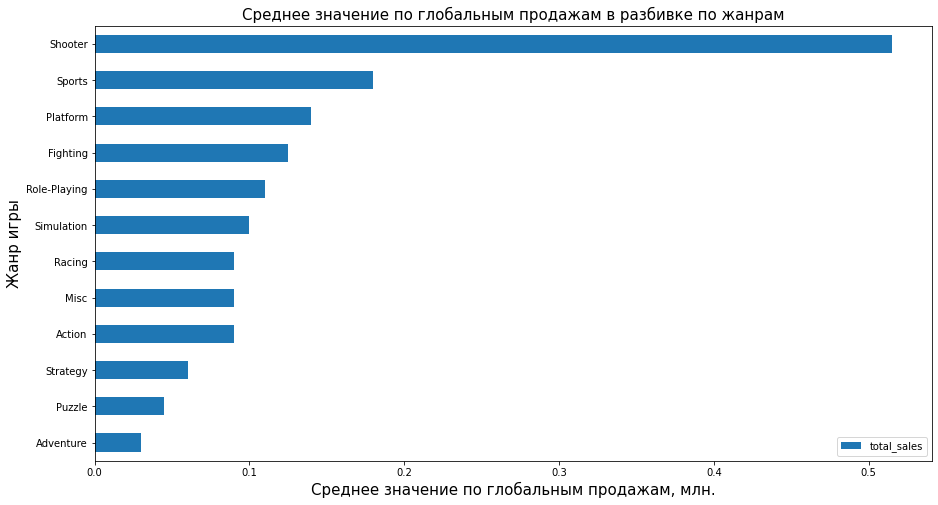

In [59]:
#по медианному значению
data.groupby('genre')['total_sales'].median().reset_index().sort_values('total_sales', ascending = True).plot(x = 'genre',
                                                                                                           kind = 'barh', 
                                                                                                           figsize = (15,8))
plt.xlabel('Среднее значение по глобальным продажам, млн.', size = 15)
plt.ylabel('Жанр игры', size = 15)
plt.title('Среднее значение по глобальным продажам в разбивке по жанрам', size = 15)
plt.show()

**вывод**

<strike> Наиболее продаваемые жанры - Action и Sports, наименее - Strategy и Puzzle

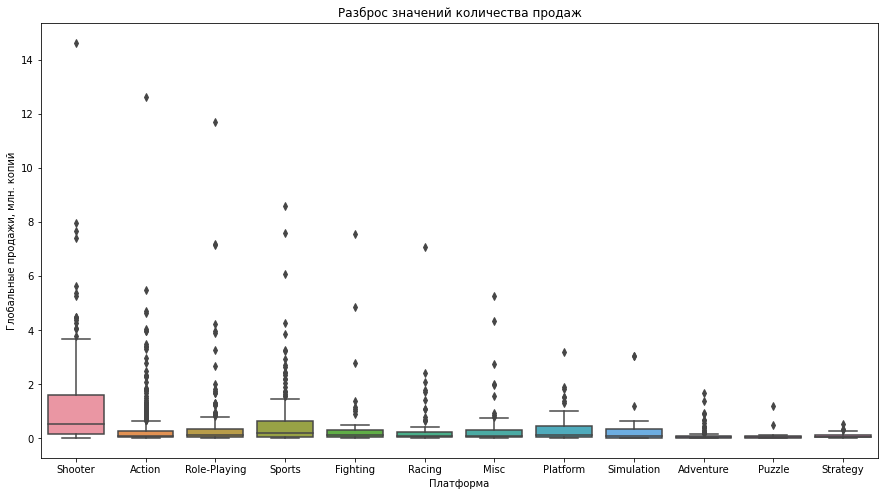

In [60]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data, x='genre', y='total_sales')
plt.title('Разброс значений количества продаж')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи, млн. копий')
plt.show()

#### Портрет пользователя каждого региона(NA, EU, JP) Определите для пользователя каждого региона:

* Выявить Самые популярные платформы (топ-5)
* Самые популярные жанры (топ-5)
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

##### Северная Америка

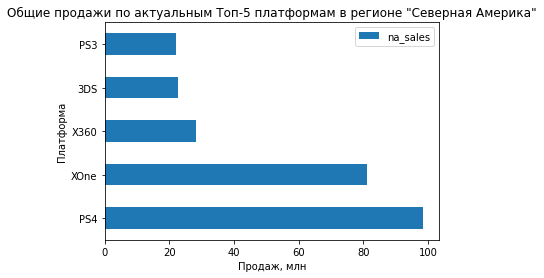

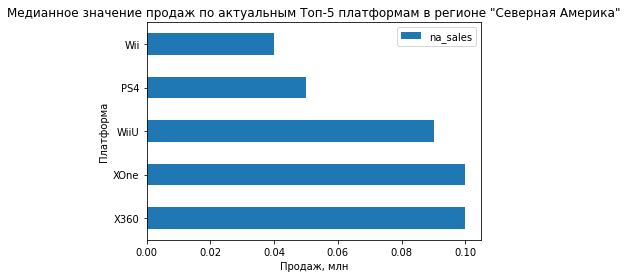

In [61]:
data.groupby('platform')['na_sales'].\
    sum().reset_index().sort_values('na_sales', ascending = False).head().\
        plot.barh(x = 'platform', title = 'Общие продажи по актуальным Топ-5 платформам в регионе "Северная Америка"')
plt.ylabel('Платформа', size = 10)
plt.xlabel('Продаж, млн', size = 10)
plt.show()


data.groupby('platform')['na_sales'].\
    median().reset_index().sort_values('na_sales', ascending = False).head().\
        plot.barh(x = 'platform', title = 'Медианное значение продаж по актуальным Топ-5 платформам в регионе "Северная Америка"')
plt.ylabel('Платформа', size = 10)
plt.xlabel('Продаж, млн', size = 10)
plt.show()

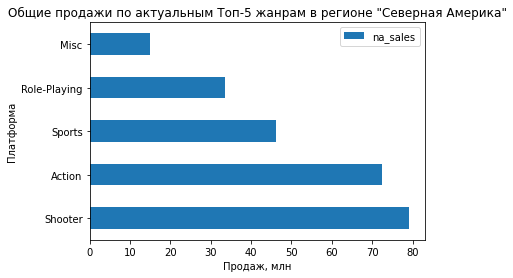

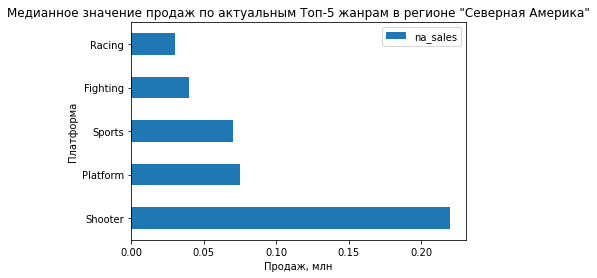

In [62]:
#data.groupby('genre')['na_sales'].\
#    sum().reset_index().sort_values('na_sales', ascending = False).head().\
#        plot.barh(x = 'genre')
#plt.title('Топ-5 жанров в Серверной Америке за все время')
#plt.ylabel('Жанры', size = 10)
#plt.xlabel('Продаж, млн', size = 10)

data.groupby('genre')['na_sales'].\
    sum().reset_index().sort_values('na_sales', ascending = False).head().\
        plot.barh(x = 'genre', title = 'Общие продажи по актуальным Топ-5 жанрам в регионе "Северная Америка"')
plt.ylabel('Платформа', size = 10)
plt.xlabel('Продаж, млн', size = 10)
plt.show()


data.groupby('genre')['na_sales'].\
    median().reset_index().sort_values('na_sales', ascending = False).head().\
        plot.barh(x = 'genre', title = 'Медианное значение продаж по актуальным Топ-5 жанрам в регионе "Северная Америка"')
plt.ylabel('Платформа', size = 10)
plt.xlabel('Продаж, млн', size = 10)
plt.show()

##### Европа

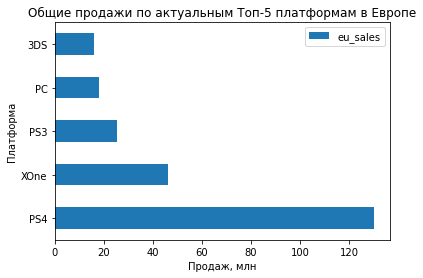

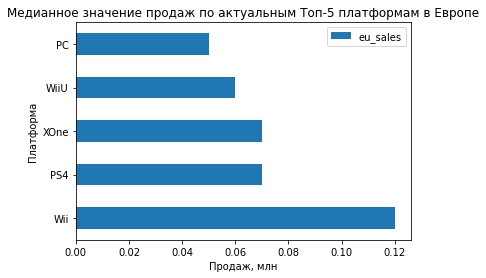

In [63]:
#data.groupby('platform')['eu_sales'].\
#    sum().reset_index().sort_values('eu_sales', ascending = False).head().\
#        plot.barh(x = 'platform')
#plt.title('Топ-5 платформ в Европе за все время')
#plt.ylabel('Платформа', size = 10)
#plt.xlabel('Продаж, млн', size = 10)

data.groupby('platform')['eu_sales'].\
    sum().reset_index().sort_values('eu_sales', ascending = False).head().\
        plot.barh(x = 'platform', title = 'Общие продажи по актуальным Топ-5 платформам в Европе')
plt.ylabel('Платформа', size = 10)
plt.xlabel('Продаж, млн', size = 10)
plt.show()


data.groupby('platform')['eu_sales'].\
    median().reset_index().sort_values('eu_sales', ascending = False).head().\
        plot.barh(x = 'platform', title = 'Медианное значение продаж по актуальным Топ-5 платформам в Европе')
plt.ylabel('Платформа', size = 10)
plt.xlabel('Продаж, млн', size = 10)
plt.show()

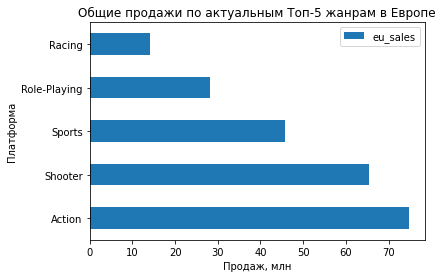

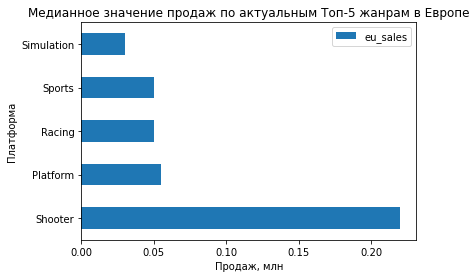

In [64]:
data.groupby('genre')['eu_sales'].\
    sum().reset_index().sort_values('eu_sales', ascending = False).head().\
        plot.barh(x = 'genre', title = 'Общие продажи по актуальным Топ-5 жанрам в Европе')
plt.ylabel('Платформа', size = 10)
plt.xlabel('Продаж, млн', size = 10)
plt.show()


data.groupby('genre')['eu_sales'].\
    median().reset_index().sort_values('eu_sales', ascending = False).head().\
        plot.barh(x = 'genre', title = 'Медианное значение продаж по актуальным Топ-5 жанрам в Европе')
plt.ylabel('Платформа', size = 10)
plt.xlabel('Продаж, млн', size = 10)
plt.show()

##### Япония

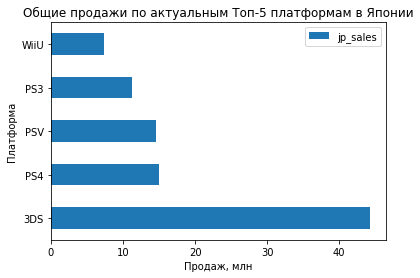

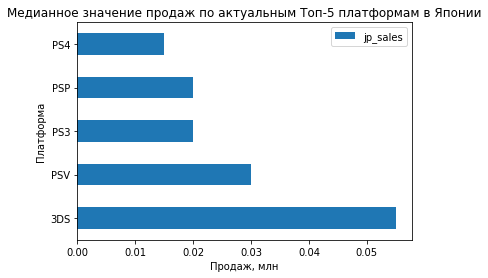

In [65]:
data.groupby('platform')['jp_sales'].\
    sum().reset_index().sort_values('jp_sales', ascending = False).head().\
        plot.barh(x = 'platform', title = 'Общие продажи по актуальным Топ-5 платформам в Японии')
plt.ylabel('Платформа', size = 10)
plt.xlabel('Продаж, млн', size = 10)
plt.show()


data.groupby('platform')['jp_sales'].\
    median().reset_index().sort_values('jp_sales', ascending = False).head().\
        plot.barh(x = 'platform', title = 'Медианное значение продаж по актуальным Топ-5 платформам в Японии')
plt.ylabel('Платформа', size = 10)
plt.xlabel('Продаж, млн', size = 10)
plt.show()

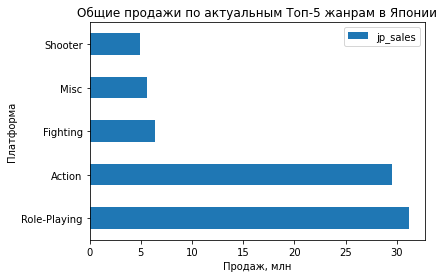

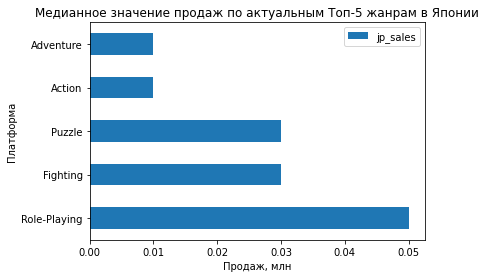

In [66]:
data.groupby('genre')['jp_sales'].\
    sum().reset_index().sort_values('jp_sales', ascending = False).head().\
        plot.barh(x = 'genre', title = 'Общие продажи по актуальным Топ-5 жанрам в Японии')
plt.ylabel('Платформа', size = 10)
plt.xlabel('Продаж, млн', size = 10)
plt.show()


data.groupby('genre')['jp_sales'].\
    median().reset_index().sort_values('jp_sales', ascending = False).head().\
        plot.barh(x = 'genre', title = 'Медианное значение продаж по актуальным Топ-5 жанрам в Японии')
plt.ylabel('Платформа', size = 10)
plt.xlabel('Продаж, млн', size = 10)
plt.show()

##### Другие регионы

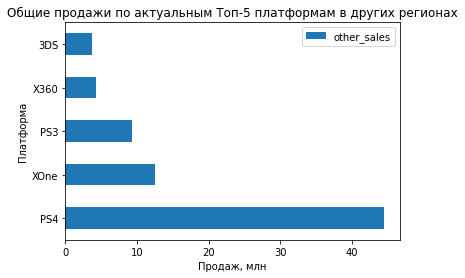

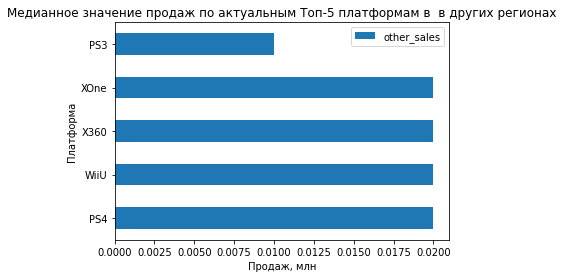

In [67]:
data.groupby('platform')['other_sales'].\
    sum().reset_index().sort_values('other_sales', ascending = False).head().\
        plot.barh(x = 'platform', title = 'Общие продажи по актуальным Топ-5 платформам в других регионах')
plt.ylabel('Платформа', size = 10)
plt.xlabel('Продаж, млн', size = 10)
plt.show()


data.groupby('platform')['other_sales'].\
    median().reset_index().sort_values('other_sales', ascending = False).head().\
        plot.barh(x = 'platform', title = 'Медианное значение продаж по актуальным Топ-5 платформам в  в других регионах')
plt.ylabel('Платформа', size = 10)
plt.xlabel('Продаж, млн', size = 10)
plt.show()

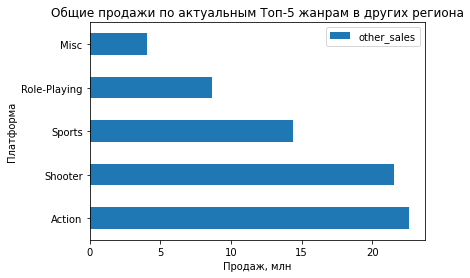

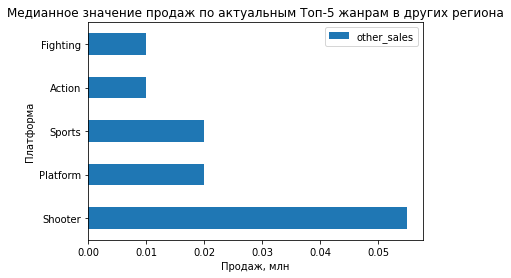

In [68]:
data.groupby('genre')['other_sales'].\
    sum().reset_index().sort_values('other_sales', ascending = False).head().\
        plot.barh(x = 'genre', title = 'Общие продажи по актуальным Топ-5 жанрам в других региона')
plt.ylabel('Платформа', size = 10)
plt.xlabel('Продаж, млн', size = 10)
plt.show()


data.groupby('genre')['other_sales'].\
    median().reset_index().sort_values('other_sales', ascending = False).head().\
        plot.barh(x = 'genre', title = 'Медианное значение продаж по актуальным Топ-5 жанрам в других региона')
plt.ylabel('Платформа', size = 10)
plt.xlabel('Продаж, млн', size = 10)
plt.show()

##### Влияние рейтинга ESRB на продажи в отдельно взятом регионе

Для наглядности заменим пустые значения с рейтингом на "NA". Будем анализировать игры за актуальный период с 2014 года.

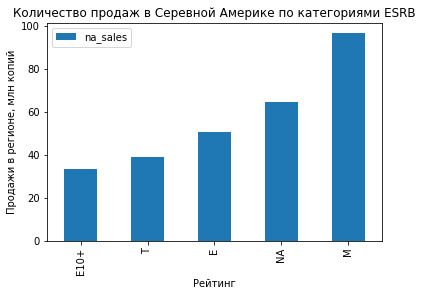

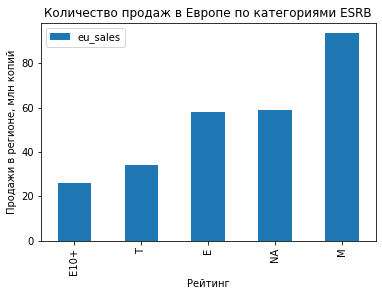

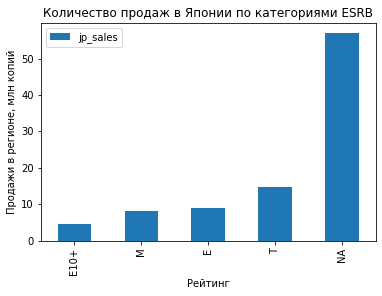

In [69]:
data.fillna('NA').groupby('rating')['na_sales'].sum().reset_index().sort_values('na_sales').plot(kind = 'bar', x = 'rating', y = 'na_sales')
plt.title('Количество продаж в Серевной Америке по категориями ESRB')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи в регионе, млн копий')
data.fillna('NA').groupby('rating')['eu_sales'].sum().reset_index().sort_values('eu_sales').plot(kind = 'bar', x = 'rating')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи в регионе, млн копий')
plt.title('Количество продаж в Европе по категориями ESRB')
data.fillna('NA').groupby('rating')['jp_sales'].sum().reset_index().sort_values('jp_sales').plot(kind = 'bar', x = 'rating')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи в регионе, млн копий')
plt.title('Количество продаж в Японии по категориями ESRB')

plt.show()

##### Вывод по портрету регионов
<div class="alert alert-info"> <b>Комментарий студента</b> 

<b>Северная Америка</b> 
* Больше всего приобретено копий игр для PS4 и Xbox one
При высоком общем объёме продаж по платформе PS4, медианное количество проданных копий по играм в два раза ниже, чем для Xvox One. Это говорит о более стабильном спросе на игры Xbox One, в то время как большой вклад в сумму продаж игр для PS4 вносят бестселлеры
  
* Однозначный лидер по продажам в Серевной америке - игры в жанре Шутер. МНого продаж и высокий стабильный спрос. Также стабильный, но более низкий спрос характерен для игр в жанре Спорт. В жанре Экшн хорошо продаются бестселлеры, а спрос на останльные игры этого жанра не очень высок
* Наибольшее количество копий продано для категории M (подростки 17+), примерно одинаковый спрос на категории "Для всех" и игры Без категории. Наименьший спрос из всех характерен для категория 10+ и 13+.
    
<b>Европа</b>    
*  Однозначным лидером в Европе является PS4: большой объем продаж при односительно одинаковом спросе на остальные платформы. Из-за небольшого общего объёма продаж по платформам Wii и WiiU даже высокая стабильность покупок оставляет этот продукт нишевым
* Потенциально интересными жанрами для продаж в Европе являются игры в жанре шутер: высокий стабильный спрос и уровень продаж. Также интерес представляют спортивные игры. Хорошо продаются бестселлеры в жанрах Action и RPG. А вот игры в жанре Racing и Platform, скорее всего, покупают в основном поклонники. Об этом говорит ебольшой объём продаж при стабильном уровне спроса
* Наибольшее количество копий продано для категории M (подростки 17+), примерно одинаковый спрос на категории "Для всех" и игры Без категории. Наименьший спрос из всех характерен для категория 10+ и 13+.
    
<b>Япония</b>     
* В Японии популярностью пользуются мобильные приставки. Самой популярной является 3DS от Nintendo. Для нее характерны стабильно высокий спрос на игры и наибольший объём продаж. В значительно меньшей степени интерес представляет PSV PS4 пользуется самой высокой популярностью среди стационарных платформ, но даже так спрос на неё меньше, чем на PSV
* Родина - популярнейших MMORPG. Высокая популярность видна и здесь. Игры в жанре PRG пользуются стабильно высоким спросом и имеют высокий уровень продаж. Примерно в районе степень представляют интерес игры в жанре ACtion и Fighting
* Большая часть проданных игр не имеет категории. Игры категорий 17+, 13+ и Без категории продаются примерно в одинаковом количестве, игры для детей 10+ пользуются наименьшим спросом

<b>Для других регионов</b> общая рекомендация: игры в жанре Шутер, спорт для платформ PS4 и Xbox One     

#### Проверка гипотез

Необходимо проверить две гипотезы:

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

##### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Сформулируем гипотезы так:

**Нулевая гипотеза (H0):** Среднее значение рейтинга пользователей  платформ Xbox One **равно** среднему значению рейтинга пользователей PC

**Альтернативная гипотеза (H1):** Среднее значение рейтинга пользователей  платформ Xbox One <strike>**больше**</strike> **не равно** среднему значению рейтинга пользователей PC

Для проверки гипотез применим <strike>**односторонний**</strike> **двусторонний** критерий Стьюдента

Так как данных для анализа немного (168 и 123 значений) и разброс значений не очень большой (выбросов нет, это обсуловлено границей оценок), выберем уровень значимости 0.05

In [70]:
alpha = 0.05 #выберем уровень статистической значимости

data_xone = data.query('platform == "XOne"')
data_pc = data.query('platform == "PC"')

print(len(data_xone['user_score'].dropna()), len(data_pc['user_score'].dropna()))

result = st.ttest_ind(data_xone['user_score'].dropna(), 
                      data_pc['user_score'].dropna(), 
                      alternative = 'two-sided')

xone_mean = data_xone['user_score'].mean()
pc_mean = data_pc['user_score'].mean()

print(f'Среднее значение пользовательской оценки для Xbox One: {xone_mean}')
print(f'Среднее значение пользовательской оценки пользователей РС: {pc_mean}')
print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print('Отвегаем нулевую гипотетезу, Среднее значение рейтинга пользователей платформ Xbox One не равно среднему значению рейтинга пользователей PC')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

168 123
Среднее значение пользовательской оценки для Xbox One: 6.597023809523809
Среднее значение пользовательской оценки пользователей РС: 6.314634146341464
p-значение: 0.11827898819673972
Не получилось отвергнуть нулевую гипотезу


**p-значение: 0.07627015836923269**. Не удалось отвергнуть нулевую гипотезу. С большой долей вероятности можем говорить, что средние оценки пользователей Xbox One и PC равны.

##### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

**Нулевая гипотеза (H0):** Среднее значение рейтинга жанра Action **равно** среднему значению рейтинга пользователей Sports

**Альтернативная гипотеза (H1):** Среднее значение рейтинга жанра Action **не равно** среднему значению рейтинга пользователей Sports

Применим двусторонний критерий Стьюдента

Уровень значмисоти выберем равным 0.05 (относительно небольшое количество наблюдений)

Возьмем данные с 2013 года, это год появления актуальных платформ: PS4,Xbox One

In [71]:
alpha = 0.01 #выберем уровень статистической значимости

data_action = data.query('genre == "Action" and year_of_release >2012')
data_sport = data.query('genre == "Sports" and year_of_release >2012')

print(len(data_action['user_score'].dropna()), len(data_sport['user_score'].dropna()))


result = st.ttest_ind(data_action['user_score'].dropna(), 
                      data_sport['user_score'].dropna(), 
                      alternative = 'greater')

action_mean = data_action['user_score'].mean()
sports_mean = data_sport['user_score'].mean()

print(f'Среднее значение пользовательской оценки для игр в жанре Action: {action_mean}')
print(f'Среднее значение пользовательской оценки игр в жанре Sports: {sports_mean}')
print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print('Отвегаем нулевую гипотетезу, игры жанра Action оцениваются пользователями выше спортивных игр')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

313 131
Среднее значение пользовательской оценки для игр в жанре Action: 6.750159744408946
Среднее значение пользовательской оценки игр в жанре Sports: 5.291603053435115
p-значение: 4.9309930393802266e-18
Отвегаем нулевую гипотетезу, игры жанра Action оцениваются пользователями выше спортивных игр


**Вывод** Гипотеза о равенстве средних показателей оценки спортивных игр и игр в жанре Action была отвергута с большой долей вероятности. Судя по средним значениям, пользователи оценивают спортивные игры ниже.  

#### Общий вывод

Был получен датасет, который состоял из 16715 строк, 11 столбцов. Данные представлены за период с 1980 по 2016 год<br> 
* Описание данных Name — название игры<br>
* Platform — платформа<br>
* Year_of_Release — год выпуска<br>
* Genre — жанр игры<br>
* NA_sales — продажи в Северной Америке (миллионы проданных копий)<br>
* EU_sales — продажи в Европе (миллионы проданных копий)<br>
* JP_sales — продажи в Японии (миллионы проданных копий)<br>
* Other_sales — продажи в других странах (миллионы проданных копий)<br>
* Critic_Score — оценка критиков (максимум 100)<br>
* User_Score — оценка пользователей (максимум 10)<br>
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.<br>

**В ходе  предобработки данных**<br>
* Были изменены типы данных:

    * год выпуска на datetime
    * оценка пользователей на float64

* Были удалены строки: в которых отсутствовал год релиза игры (269 строк) С пропусками в названии (1 строка)

* Был создан столбец, в котором посчитана общая сумма выручки от продажи игры

<div class="alert alert-info"> <b>Добавлено после доработки</b>
    * в данных есть 269 строк, в которых пропущен год выпуска игры. Скорее всего, при загружке данных произошла техническая ошибка, т.к. в сети информация по году выхода игр есть </div>

 **В ходе  исследовательского анализа**

* Рассматривались данные с 1980 по 2016 год.
* С 1990 года спрос на игры начал расти и достиг своего пика в 2007-2008 годах. После наблюдается серьёзный спад интереса. Вероятнее всего из-за появления мобильных телефонов.

* Средний жизненный цикл платформы составляет 7 лет. Новые плфтормы появлялись каждые 5 лет.
Можно выделить условно несколько циклов
    * До 1990 года
    * 1990 - 2000
    * 1995 - 2002
    * 2000 - 2007
    * 2004 - 2015 (самый долгий срок жизни платформ)
    * 2010 - 2015

В разные периоды были популярны разные платформы. Более-менее стабильный, но невыский спрос, был на компьютерные игры для PC.

Актаульные даты для дальнешейго анализа - с 2013 года обусловлены тем, что в это вреия появились новые версии популярных игровых платформ: PS4, Xbox One и 3DS

**Самыми популярными за все время (топ 5) являются платформы** 
* PS2	- 1233.56 млн копий игр продано
* 	X360	959.99 млн копий игр продано
*	PS3	931.33 млн копий игр продано
*	Wii	891.18 млн копий игр продано
*	DS	802 млн копий игр продано

<div class="alert alert-info"> <b>Добавлено после доработки</b>

Самые популярные актуальные платформы
* PS4	288.15 млн. копий продано
* XOne	140.36 млн. копий продано
* 3DS	86.68 млн. копий продано
* PS3	68.18 млн. копий продано
* X360	48.22 млн. копий продано
* WiiU	42.98 млн. копий продано
* PC	27.05 млн. копий продано
* PSV	22.40 млн. копий продано


График разброса значений для топ-10 популярных платформ показал, что среднее количество продаж не одинаково



На графике видны игры-бестселлеры. Также заметно, что количество игр по жанром тоже отличается


Мнение пользователей оказывает меньшее влияние на продажи, чем оценки критиков. <strike>В первую очередь это касается линейки От Sony</strike>

<strike>Наиболее продаваемые жанры - Action и Sports, наименее - Strategy и Puzzle</strike>

**Исправлено**
* Игры, приносящие стабильный доход - это Shooter и Sport
* Наименьший доход приносят Puzzle и Adventure </div>

<b>Актуальными данными будем считать данные за последние полные 2 года (2014-2015) и 2016 год (в нем данные не полные). Сделаем срез по актуальным данным</b>

**В ходе анализа портрета регионов выяснено**

<strike>В **Северной Америке** 
* наиболее популярными платформами за все время являлись XBOX360 и PS2, при этом на данный момент это PS4 и XBOX one
* Наибольшее количество копий продано для категории M (подростки 17+), примерно одинаковый спрос на категории "Для всех" и игры Без категории. Наименьший спрос из всех характерен для категория 10+ и 13+.
* В последнее время самым популярным жанром остается Action Shooter и Sport на 2 и 3 места. Из топ5 исчез жанр RAcing, на смену ему пришли игры в жанре RGP.


Для **Европы**
* Наибольшее количество копий продано для категории M (подростки 17+), примерно одинаковый спрос на категории "Для всех" и игры Без категории. Наименьший спрос из всех характерен для категория 10+ и 13+.
* В Европе наиболее популярными платформами за все время являлись PS2, PS3 и на 3 месте XBOX360, при этом на данный момент безусловный лидер - PS4, с огромным отставанием XBOX One
* ПОстоянно популрны игры в жанре Action. Но при этом в последнее время игры в жанре Shooter стали более популярными и в топ-5 попал жанр Role-playing и исчез жанр Misc

**Для Японии** . 
* Большая часть проданных игр не имеет категории. Игры  категорий 17+, 13+ и Без категории продаются примерно в одинаковом количестве, игры для детей 10+ пользуются наименьшим спросом
* В Японии большим спросом пользуется платформа DS и 3DS, а также логична преемственность приставок от SONY. 
* Традиционно популярны в Японии жанры Action и Role-Playing, в последние годы у игроков стали популярны файтинги и шутеры
</strike>

<div class="alert alert-info"> <b>Комментарий студента</b> 

<b>Северная Америка</b> 
* Больше всего приобретено копий игр для PS4 и Xbox one
При высоком общем объёме продаж по платформе PS4, медианное количество проданных копий по играм в два раза ниже, чем для Xvox One. Это говорит о более стабильном спросе на игры Xbox One, в то время как большой вклад в сумму продаж игр для PS4 вносят бестселлеры
  
* Однозначный лидер по продажам в Серевной америке - игры в жанре Шутер. МНого продаж и высокий стабильный спрос. Также стабильный, но более низкий спрос характерен для игр в жанре Спорт. В жанре Экшн хорошо продаются бестселлеры, а спрос на останльные игры этого жанра не очень высок
* Наибольшее количество копий продано для категории M (подростки 17+), примерно одинаковый спрос на категории "Для всех" и игры Без категории. Наименьший спрос из всех характерен для категория 10+ и 13+.
    
<b>Европа</b>    
*  Однозначным лидером в Европе является PS4: большой объем продаж при односительно одинаковом спросе на остальные платформы. Из-за небольшого общего объёма продаж по платформам Wii и WiiU даже высокая стабильность покупок оставляет этот продукт нишевым
* Потенциально интересными жанрами для продаж в Европе являются игры в жанре шутер: высокий стабильный спрос и уровень продаж. Также интерес представляют спортивные игры. Хорошо продаются бестселлеры в жанрах Action и RPG. А вот игры в жанре Racing и Platform, скорее всего, покупают в основном поклонники. Об этом говорит ебольшой объём продаж при стабильном уровне спроса
* Наибольшее количество копий продано для категории M (подростки 17+), примерно одинаковый спрос на категории "Для всех" и игры Без категории. Наименьший спрос из всех характерен для категория 10+ и 13+.
    
<b>Япония</b>     
* В Японии популярностью пользуются мобильные приставки. Самой популярной является 3DS от Nintendo. Для нее характерны стабильно высокий спрос на игры и наибольший объём продаж. В значительно меньшей степени интерес представляет PSV PS4 пользуется самой высокой популярностью среди стационарных платформ, но даже так спрос на неё меньше, чем на PSV
* Родина - популярнейших MMORPG. Высокая популярность видна и здесь. Игры в жанре PRG пользуются стабильно высоким спросом и имеют высокий уровень продаж. Примерно в районе степень представляют интерес игры в жанре ACtion и Fighting
* Большая часть проданных игр не имеет категории. Игры категорий 17+, 13+ и Без категории продаются примерно в одинаковом количестве, игры для детей 10+ пользуются наименьшим спросом

<b>Для других регионов</b> общая рекомендация: игры в жанре Шутер, спорт для платформ PS4 и Xbox One     

Рейтинг ESBR влияет на продажи игр в Америке и Европе, в Японии в меньшей степени.
</div>    
    
**Было проверено две гипотезы**
*  С большой долей вероятности можем говорить, что средние оценки пользователей Xbox One и PC равны.
* Гипотеза о равенстве средних показателей оценки спортивных игр и игр в жанре Action была отвергута с большой долей вероятности. Судя по средним значениям, пользователи оценивают спортивные игры ниже.